In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use( 'ggplot' ) 
import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submit = pd.read_csv('gender_submission.csv')

In [3]:
df_data = df_train.append( df_test )
df_data.reset_index(inplace=True, drop= True)

In [4]:
df_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# 定義判別欄位型態的函數
def Col_Types(Data):
    Column_Types =  Data.dtypes.to_frame().reset_index() 
    Column_Types.columns = ['ColumnName','Type']
    return Column_Types
display( Col_Types(df_data) )

,ColumnName,Type
0,PassengerId,int64
1,Survived,float64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


In [6]:
# 定義用來統計欄位缺漏值總數的函數
def Missing_Counts( Data ) : 
    missing = Data.isnull().sum()
    missing = missing[missing>0]
    missing.sort_values(inplace=True)
    
    Missing_Count = pd.DataFrame( { 'ColumnName':missing.index, 'MissingCount':missing.values } )  # Convert Series to DataFrame
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['MissingCount'].apply( lambda x:round(x/Data.shape[0]*100,2) )
    return  Missing_Count

print(Missing_Counts( df_data ))

  ColumnName  MissingCount  Percentage(%)
0       Fare             1           0.08
1   Embarked             2           0.15
2        Age           263          20.09
3   Survived           418          31.93
4      Cabin          1014          77.46


# Data Analysis

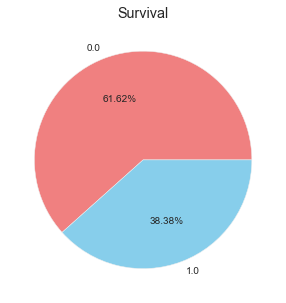

In [7]:
plt.figure( figsize=(10,5) )
df_data['Survived'].value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Survival' )  # 圖標題
plt.ylabel( '' )
plt.show()

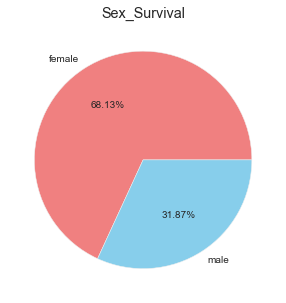

In [8]:
plt.figure( figsize=(10,5) )
df_Sex=df_data[df_data['Survived']==1]
df_Sex['Sex'].value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Sex_Survival' )  
plt.ylabel( '' )
plt.show()

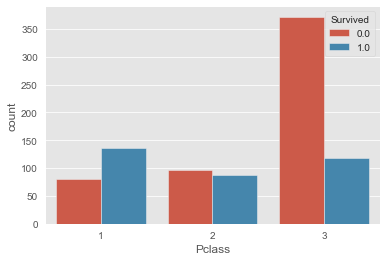

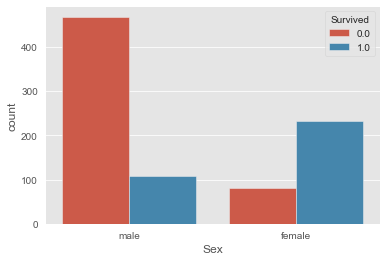

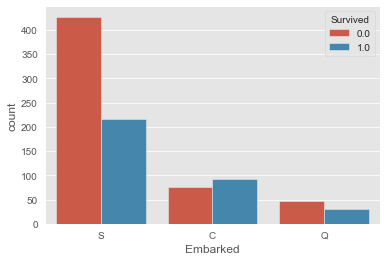

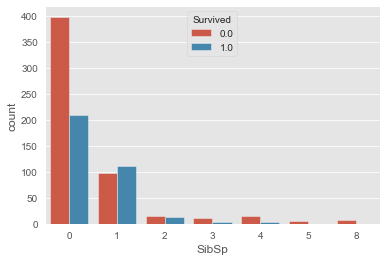

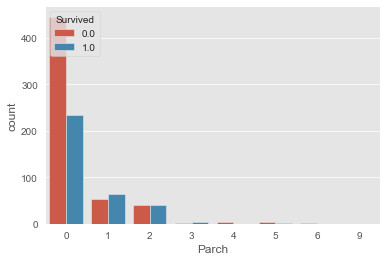

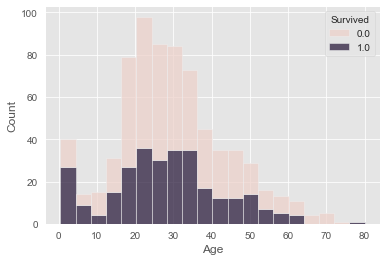

In [9]:
sns.countplot(x = df_data['Pclass'],hue=df_data['Survived'])
plt.show()
sns.countplot(x = df_data['Sex'],hue=df_data['Survived'])
plt.show()
sns.countplot(x = df_data['Embarked'],hue=df_data['Survived'])
plt.show()
sns.countplot(x = df_data['SibSp'],hue=df_data['Survived'])
plt.show()
sns.countplot(x = df_data['Parch'],hue=df_data['Survived'])
plt.show()
sns.histplot(data=df_data, x="Age",hue='Survived',multiple="stack")
plt.show()

In [10]:
# 新增標註 Age 欄位是否為缺漏值的欄位(有缺漏標為0)
df_data['isAge'] = df_data['Age'].isnull().map( lambda x:0 if x==True else 1 )

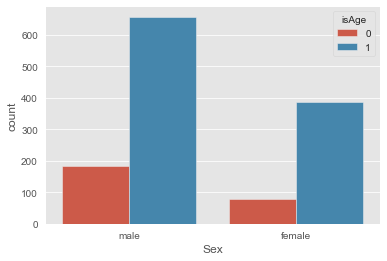

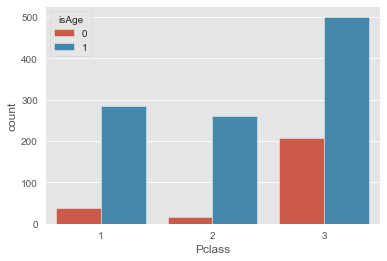

In [11]:
sns.countplot(x = "Sex",hue='isAge', data=df_data)
plt.show()
sns.countplot(x = "Pclass",hue='isAge', data=df_data)
plt.show()

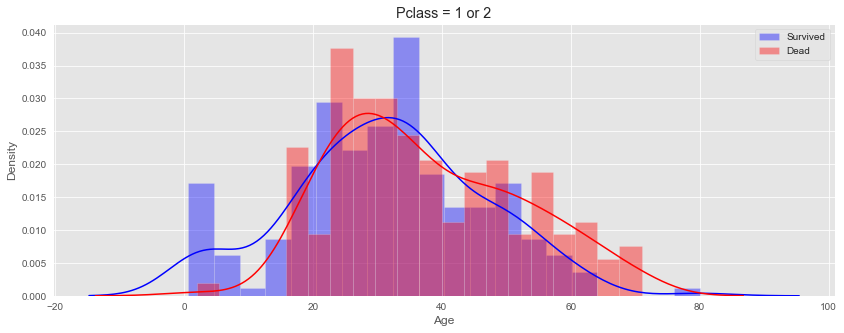

In [12]:
index_S = (df_data.isAge==1)&(df_data.Pclass!=3)&(df_data.Survived==1)
index_D = (df_data.isAge==1)&(df_data.Pclass!=3)&(df_data.Survived==0)

plt.figure( figsize=(14,5) )
sns.distplot( df_data.loc[index_S,'Age'], bins=20, color='blue', label='Survived' )
sns.distplot( df_data.loc[index_D,'Age'], bins=20, color='red', label='Dead' )
plt.title( 'Pclass = 1 or 2' )
plt.legend( )
plt.show( )

In [13]:
df_data['Title']=df_data['Name'].str.split(",",expand=True)[1]
df_data['Title']=df_data['Title'].str.split(".",expand=True)[0]
#print(df_data['Title'].unique())

In [14]:
cross1= pd.crosstab(df_data['Title'], df_data['Sex'])
cross2= pd.crosstab(df_data['Title'], df_data['Survived'])
print(cross2)

Survived       0.0  1.0
Title                  
 Capt            1    0
 Col             1    1
 Don             1    0
 Dr              4    3
 Jonkheer        1    0
 Lady            0    1
 Major           1    1
 Master         17   23
 Miss           55  127
 Mlle            0    2
 Mme             0    1
 Mr            436   81
 Mrs            26   99
 Ms              0    1
 Rev             6    0
 Sir             0    1
 the Countess    0    1


In [15]:
#各Title的平均年齡
group= df_data.groupby(['Title'])['Age'].mean()

In [16]:
#簡化Title
df_data['Title']=df_data['Title'].replace(to_replace=['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir'],value=['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr'],regex=True)
df_data['Title']=df_data['Title'].replace(to_replace=['Dona','Don'],value=['Mrs','Mr'],regex=True)
df_data['Title']=df_data['Title'].str.lstrip()

In [17]:
df_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [18]:
group= df_data.groupby(['Title'])['Age'].mean()
print(group)

Title
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64


In [19]:
Age_Mean = df_data[['Title','Age']].groupby( by=['Title'] ).mean()
Age_Median = df_data[['Title','Age']].groupby( by=['Title'] ).median()

Age_Mean.columns = ['Age Mean']
Age_Median.columns = ['Age Median']
Age_Mean.reset_index( inplace=True )
Age_Median.reset_index( inplace=True )

In [20]:
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Master'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Master','Age Mean'][0]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Miss'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Miss','Age Mean'][1]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Mr'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Mr','Age Mean'][2]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Mrs'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Mrs','Age Mean'][3]

In [21]:
# 乘客年齡是否未滿17歲(是：1；否：0)
df_data[ 'is_Age_17' ] = (df_data.Age<17)*1

In [22]:
df_data.drop( 'isAge', axis=1, inplace=True )

In [23]:
df_data['Ticket']

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 1309, dtype: object

In [24]:
#簡化船票資訊
df_data['Ticket_info'] = df_data.Ticket.apply( lambda x : (x).replace('.','').replace('/','').strip().split(' ')[0]if not x.isdigit() else 'X')
print(df_data['Ticket_info'].unique())

['A5' 'PC' 'STONO2' 'X' 'PP' 'CA' 'SCParis' 'SCA4' 'A4' 'SP' 'SOC' 'WC'
 'SOTONOQ' 'WEP' 'STONO' 'C' 'SCPARIS' 'SOP' 'Fa' 'LINE' 'FCC' 'SWPP'
 'SCOW' 'PPP' 'SC' 'SCAH' 'AS' 'SOPP' 'FC' 'SOTONO2' 'CASOTON' 'SCA3'
 'STONOQ' 'AQ4' 'A' 'LP' 'AQ3']


In [25]:
df_data['Fare']

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

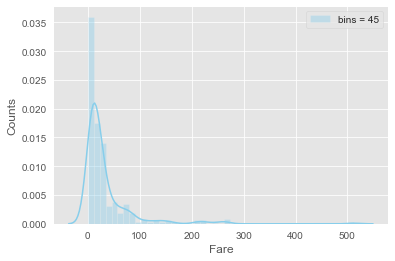

In [26]:
sns.distplot( df_data.Fare, kde=True, bins=45, color='skyblue', label='bins = 45' )
plt.xlabel( 'Fare' ) 
plt.ylabel( 'Counts' ) 
plt.legend( )

Text(0.5, 0, 'Fare')

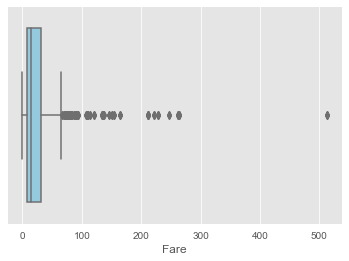

In [27]:
#檢查離群值
sns.boxplot( df_data.Fare, orient='h', color='skyblue' )
plt.xlabel( 'Fare' ) 

In [28]:
P_all = [ np.nanpercentile( df_data.Fare, q=i ) for i in np.arange(0,101) ] 
Pth_Percentile = pd.DataFrame( { 'Q':list(range(101)), 'Value':P_all } )

# The first、second and third quartile(i,e., the 25th、50th and 75th Percentile)
Q1 = Pth_Percentile.iloc[ 25, 1 ]
Q2 = Pth_Percentile.iloc[ 50, 1 ]
Q3 = Pth_Percentile.iloc[ 75, 1 ]
IQR = Q3 - Q1

print( f'Q1 = {Q1}' )
print( f'Q2 = {Q2} = Median' )
print( f'Q3 = {Q3}' )
print( f'Maximum = {df_data.Fare.max()}')
print( f'IQR = Q3 - Q1 = {IQR}' )
print( f'Q3 + 1.5IQR = {Q3+1.5*IQR}' )

# 依照四分位數，對 Fare 欄位進行分組
Fare_bin = [ 0, Q1, Q2, Q3, Q3+1.5*IQR, df_data.Fare.max() ]
df_data[ 'Fare_Group' ] = pd.cut( df_data.Fare.values, Fare_bin )

# 計算每個分組中的資料筆數
Group_Counts = df_data[ 'Fare_Group' ].value_counts().reset_index()    
Group_Counts.columns = [ 'Fare_Group', 'Counts' ]
Group_Counts.sort_values( by='Fare_Group' )

Q1 = 7.8958
Q2 = 14.4542 = Median
Q3 = 31.275
Maximum = 512.3292
IQR = Q3 - Q1 = 23.379199999999997
Q3 + 1.5IQR = 66.34379999999999


,Fare_Group,Counts
2,"(0.0, 7.896]",320
1,"(7.896, 14.454]",320
0,"(14.454, 31.275]",328
4,"(31.275, 66.344]",152
3,"(66.344, 512.329]",171


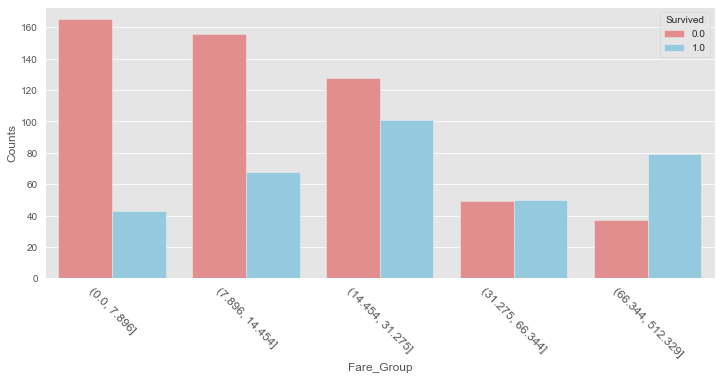

In [29]:
plt.subplots( figsize=(12,5) )
sns.countplot( df_data.Fare_Group, hue=df_data.Survived, palette=['lightcoral','skyblue'] )
plt.ylabel( 'Counts' ) 
plt.xticks( rotation=-45, fontsize=12 )
plt.show()

In [30]:
df_data['Fare_Group']

0            (0.0, 7.896]
1       (66.344, 512.329]
2         (7.896, 14.454]
3        (31.275, 66.344]
4         (7.896, 14.454]
              ...        
1304      (7.896, 14.454]
1305    (66.344, 512.329]
1306         (0.0, 7.896]
1307      (7.896, 14.454]
1308     (14.454, 31.275]
Name: Fare_Group, Length: 1309, dtype: category
Categories (5, interval[float64]): [(0.0, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 66.344] < (66.344, 512.329]]

In [31]:
df_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,is_Age_17,Ticket_info,Fare_Group
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,0,A5,"(0.0, 7.896]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,0,PC,"(66.344, 512.329]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,STONO2,"(7.896, 14.454]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,0,X,"(31.275, 66.344]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,0,X,"(7.896, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.811056,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,A5,"(7.896, 14.454]"
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Mrs,0,PC,"(66.344, 512.329]"
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,SOTONOQ,"(0.0, 7.896]"
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.811056,0,0,359309,8.0500,NaN,S,Mr,0,X,"(7.896, 14.454]"


In [32]:
# 刪除 Fare_Group 欄位 
df_data.drop( ['Fare_Group'], axis=1, inplace=True )

In [33]:
# OneHot Encoding
OneHot_Embarked = pd.get_dummies( df_data.Embarked, prefix='Embarked' )

# 合併 Embarked 編碼後的欄位
df_data = pd.concat( [ df_data, OneHot_Embarked ], axis=1 )
df_data.drop( 'Embarked', axis=1, inplace=True )

In [34]:
# Label Encoding
Sex_mapping = { 'male':0, 'female':1 }
df_data[ 'Sex' ] = df_data.Sex.map( Sex_mapping )

In [35]:
print( f'Shape of data after feature engineering = {df_data.shape}' )
df_data.head()

Shape of data after feature engineering = (1309, 17)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,is_Age_17,Ticket_info,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,Mr,0,A5,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,Mrs,0,PC,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0,STONO2,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,Mrs,0,X,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,Mr,0,X,0,0,1


In [36]:
 df_data['Fare'].fillna( df_data.Fare.mode(), inplace=True)

In [37]:
for col in ['Title','Ticket_info','Cabin']:
    df_data[col] = df_data[col].astype('category').cat.codes

df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,is_Age_17,Ticket_info,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,-1,2,0,2,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,106,3,0,14,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,-1,1,0,31,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,70,3,0,36,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,-1,2,0,36,0,0,1


In [38]:
# 產生訓練集和測試集
Train = df_data[ pd.notnull(df_data.Survived) ]
Test = df_data[ pd.isnull(df_data.Survived) ]

# 訓練集刪除 PassengerId 欄位；
# 測試集刪除 PassengerId 與 Survived 欄位
Train.drop( ['PassengerId','Name','Ticket'], axis=1, inplace=True )
Test.drop( ['PassengerId','Name','Ticket','Survived'], axis=1, inplace=True )

# 將測試集中的標籤欄位 Survived 單獨拆出
Y_Train = Train.Survived
X_Train = Train.drop( ['Survived'], axis=1 )

print( f'Shape of X_Train = {X_Train.shape}' )
print( f'Shape of Y_Train = {Y_Train.shape}' )
print( f'Shape of Test = {Test.shape}' )

Shape of X_Train = (891, 13)
Shape of Y_Train = (891,)
Shape of Test = (418, 13)


In [39]:
 Test['Fare'].fillna( df_data.Fare.mode(), inplace=True)

In [45]:
df_data.Fare.mode()

0    8.05
dtype: float64

In [46]:
 Test['Fare'].fillna( 8.05 , inplace=True)

In [47]:
 Test[Test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,is_Age_17,Ticket_info,Embarked_C,Embarked_Q,Embarked_S


In [41]:
# 決策樹(Decision Tree)
from sklearn.tree import DecisionTreeClassifier
# 隨機森林(Random Forest)
from sklearn.ensemble import RandomForestClassifier

In [42]:
# 隨機森林參數：
# n_estimators: 樹的數量(default=10)。
# min_samples_leaf: 最終葉節點最少樣本數(default=1)；
#                   當樣本不大時，可不設定使用預設，若樣本數量非常大時，則推薦增加此參數值。
# min_samples_split:節點再劃分時所需的最小樣本數(default=2)；
#                   當樣本不大時，可不設定使用預設，若樣本數量非常大時，則推薦增加此參數值。
# oob_score: 是否採用袋外樣本(out-of-bag samples)來評估模型的準確度(default=False)。

RFC = RandomForestClassifier( n_estimators = 1000,
                              min_samples_split = 20,
                              min_samples_leaf = 1,
                              oob_score = True,
                              random_state = 1,
                              n_jobs = -1 )

In [43]:
# 訓練模型
RFC.fit( X_Train, Y_Train )
print( 'oob_score = {:.6f}'.format(RFC.oob_score_) )

oob_score = 0.830527


In [49]:
# 預測測試集資料
Test_pred = RFC.predict( Test )

# 檢視預測罹難或生還的機率
#print( RFC.predict_proba(Test ))


In [51]:
# 提交檔案
submit['Survived'] = Test_pred.astype(int)
submit.to_csv( 'Titanic_RandomForest_.csv', index=False )
print( f'預測結果：' )
submit

預測結果：


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
